In [6]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
db_path = "/content/drive/MyDrive/Projets/FDD/bd/fusion_ieee.db"
conn = sqlite3.connect(db_path)
print("🔹 Connexion réussie à la base fusionnée")

🔹 Connexion réussie à la base fusionnée


Chargement des tables

In [9]:
articles = pd.read_sql_query("SELECT * FROM articles", conn)
authors = pd.read_sql_query("SELECT * FROM authors", conn)
keywords = pd.read_sql_query("SELECT * FROM keywords", conn)
labs = pd.read_sql_query("SELECT * FROM labs", conn)
author_labs = pd.read_sql_query("SELECT * FROM author_labs", conn)
article_authors = pd.read_sql_query("SELECT * FROM article_authors", conn)

print(f"\n📊 Nombre de lignes : articles={len(articles)}, authors={len(authors)}, keywords={len(keywords)}")


📊 Nombre de lignes : articles=10077, authors=53493, keywords=159043


Articles par années

/tmp/ipython-input-1328710120.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=year_counts.index, y=year_counts.values, palette="viridis")


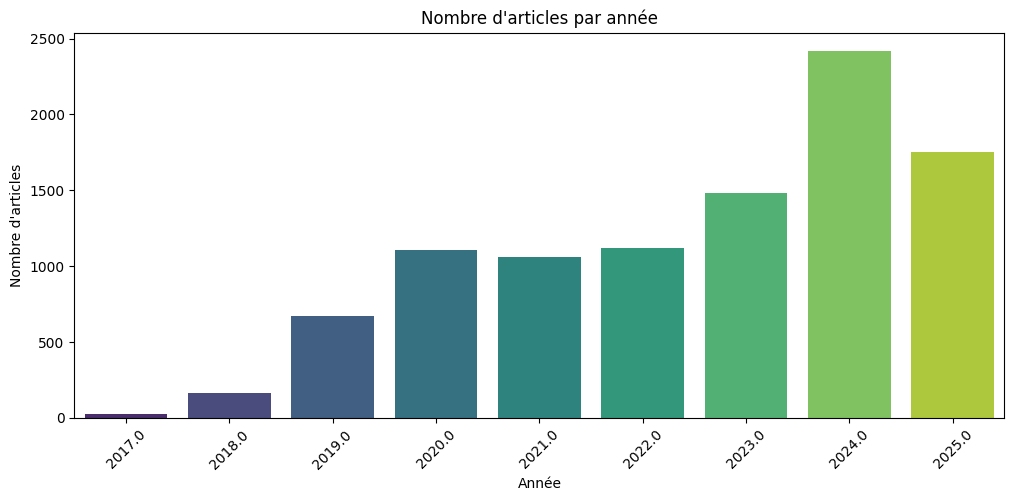

In [10]:
articles['year'] = pd.to_datetime(articles['date_publication'], errors='coerce').dt.year
year_counts = articles['year'].value_counts().sort_index()
plt.figure(figsize=(12,5))
sns.barplot(x=year_counts.index, y=year_counts.values, palette="viridis")
plt.title("Nombre d'articles par année")
plt.ylabel("Nombre d'articles")
plt.xlabel("Année")
plt.xticks(rotation=45)
plt.show()

Top 10 des auteurs

In [11]:
author_counts = article_authors['author_id'].value_counts().head(10)
top_authors = authors[authors['id'].isin(author_counts.index)]
top_authors = top_authors.merge(author_counts.rename("nb_articles"), left_on='id', right_index=True)
print("\n🧑 Top 10 auteurs par nombre d'articles :")
display(top_authors[['name','nb_articles']])


🧑 Top 10 auteurs par nombre d'articles :


,name,nb_articles
502,mohamed abdel-basset,13
503,mohamed elhoseny,17
926,giovanna culot,12
1066,nida aslam,11
1168,guohao li,13
1171,piotr piekos,14
1332,kalda galyna,12
1753,sethembiso nonjabulo langazane,16
2291,hatem ibn-khedher,12
2294,mohammed laroui,14


Top 10 des laboratoires

In [12]:
lab_counts = author_labs['lab_id'].value_counts().head(10)
top_labs = labs[labs['id'].isin(lab_counts.index)]
top_labs = top_labs.merge(lab_counts.rename("nb_articles"), left_on='id', right_index=True)
print("\n🏢 Top 10 labs par nombre d'auteurs :")
display(top_labs[['lab_name','country','nb_articles']])


🏢 Top 10 labs par nombre d'auteurs :


,lab_name,country,nb_articles
56,"School of Electrical and Computer Engineering,...",Israel,21
171,"Department of Computer Science, Vrije Universi...",The Netherlands,19
327,Division of Information and Computing Technolo...,Qatar,24
465,"University of Chinese Academy of Sciences, Bei...",China,22
505,Center for Computational Engineering and Netwo...,India,19
920,School of Electrical and Information Engineeri...,South Africa,18
1139,College of Computer Science and Software Engin...,China,20
2503,"College of Computer Science, Sichuan Universit...",China,28
3263,"Department of Informatics and Telematics, Haro...",Greece,18
3403,"Department of Software Engineering, University...",Pakistan,20


Répartitions des articles par pays

/tmp/ipython-input-2346899681.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.index, y=country_counts.values, palette="magma")


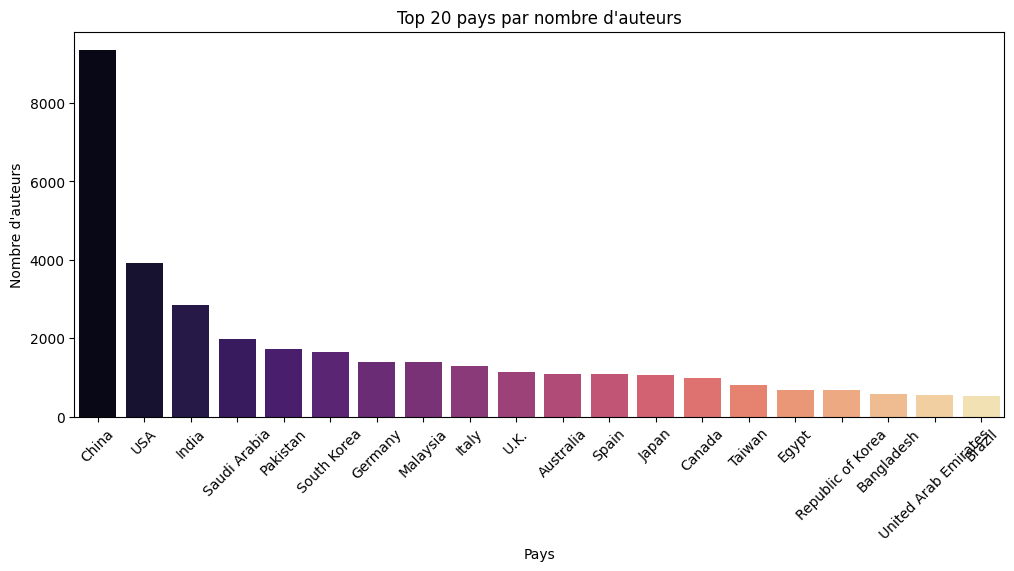

In [13]:
au_lab = author_labs.merge(authors, left_on='author_id', right_on='id')
au_lab = au_lab.merge(labs, left_on='lab_id', right_on='id', suffixes=('_author','_lab'))

country_counts = au_lab['country'].value_counts().head(20)
plt.figure(figsize=(12,5))
sns.barplot(x=country_counts.index, y=country_counts.values, palette="magma")
plt.title("Top 20 pays par nombre d'auteurs")
plt.ylabel("Nombre d'auteurs")
plt.xlabel("Pays")
plt.xticks(rotation=45)
plt.show()

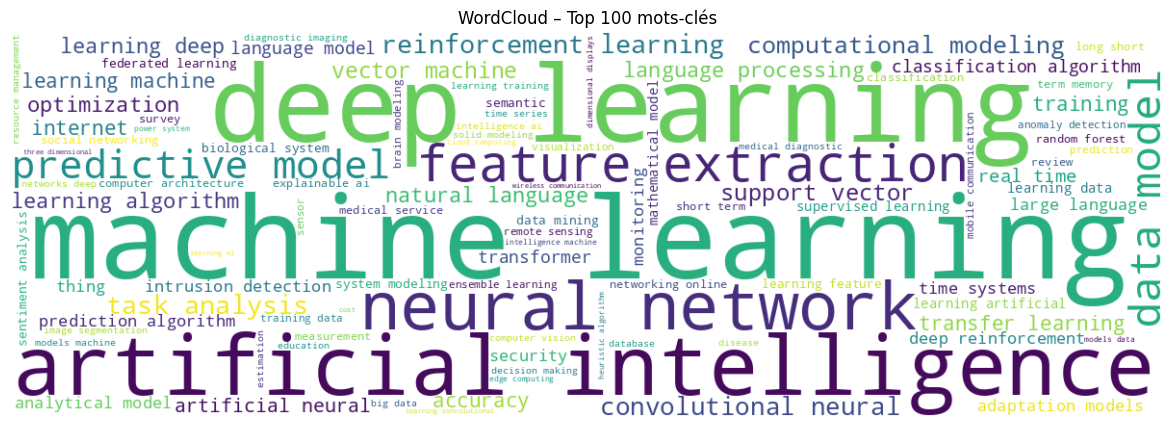

In [14]:
all_keywords = " ".join(keywords['keyword'].dropna())
wc = WordCloud(width=1200, height=400, background_color='white', colormap='viridis', max_words=100).generate(all_keywords)
plt.figure(figsize=(15,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud – Top 100 mots-clés")
plt.show()

Top 20 mots-clés par occurence

/tmp/ipython-input-2168584414.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_keywords.index, y=top_keywords.values, palette="coolwarm")


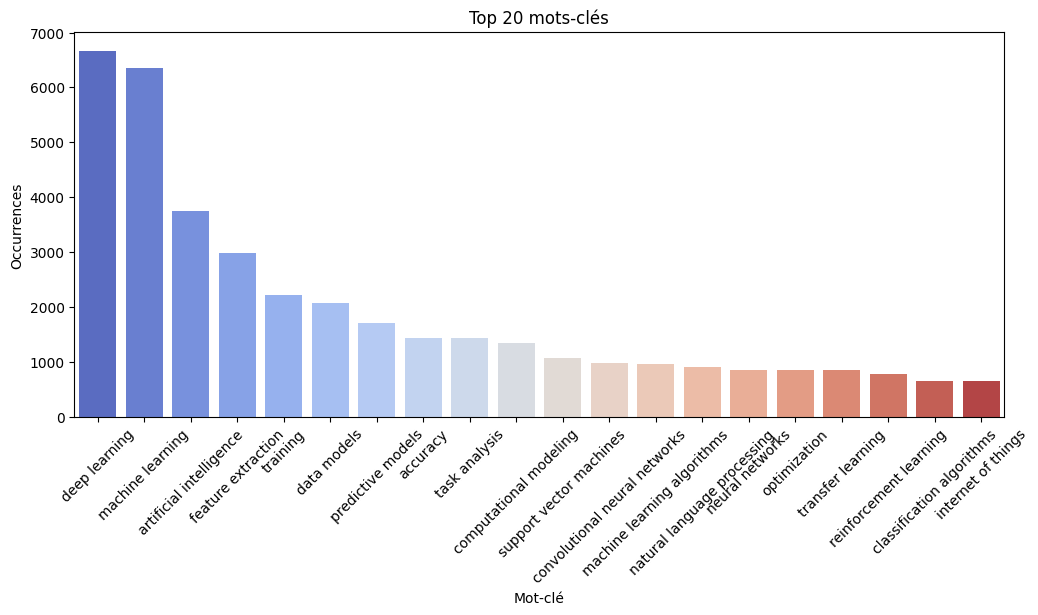

In [15]:
top_keywords = keywords['keyword'].value_counts().head(20)
plt.figure(figsize=(12,5))
sns.barplot(x=top_keywords.index, y=top_keywords.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Top 20 mots-clés")
plt.ylabel("Occurrences")
plt.xlabel("Mot-clé")
plt.show()